# Question 1

## (a)

In [1]:
library(TSA)


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



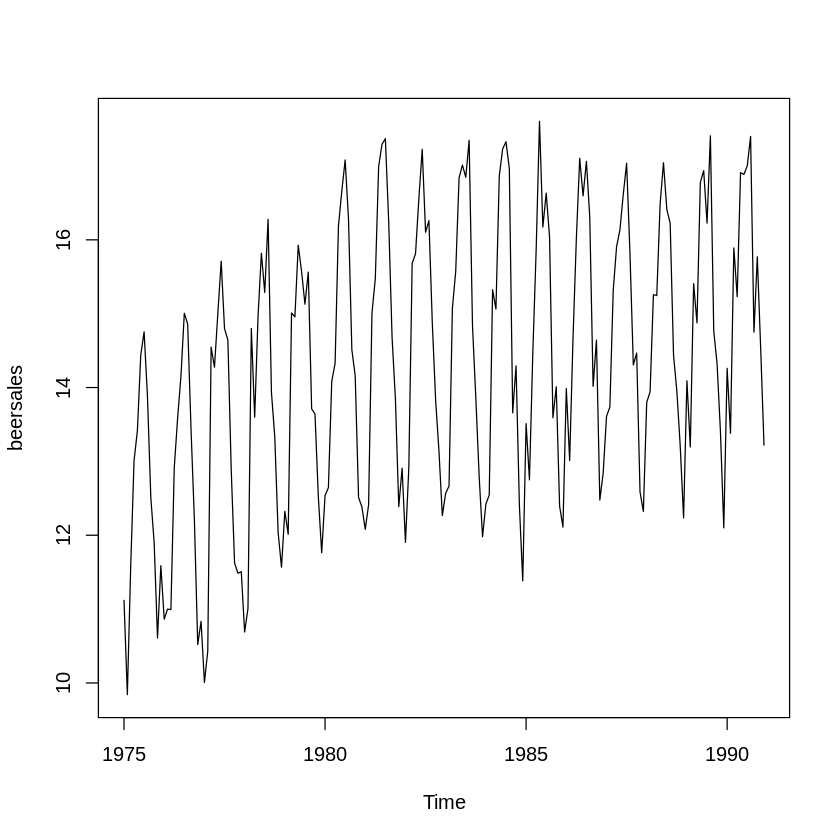

In [2]:
data(beersales)
plot(beersales)

### There are clear seasonal trends. Also beer sales increased from 1975 to around 1981 and then leveled out.

## (b)

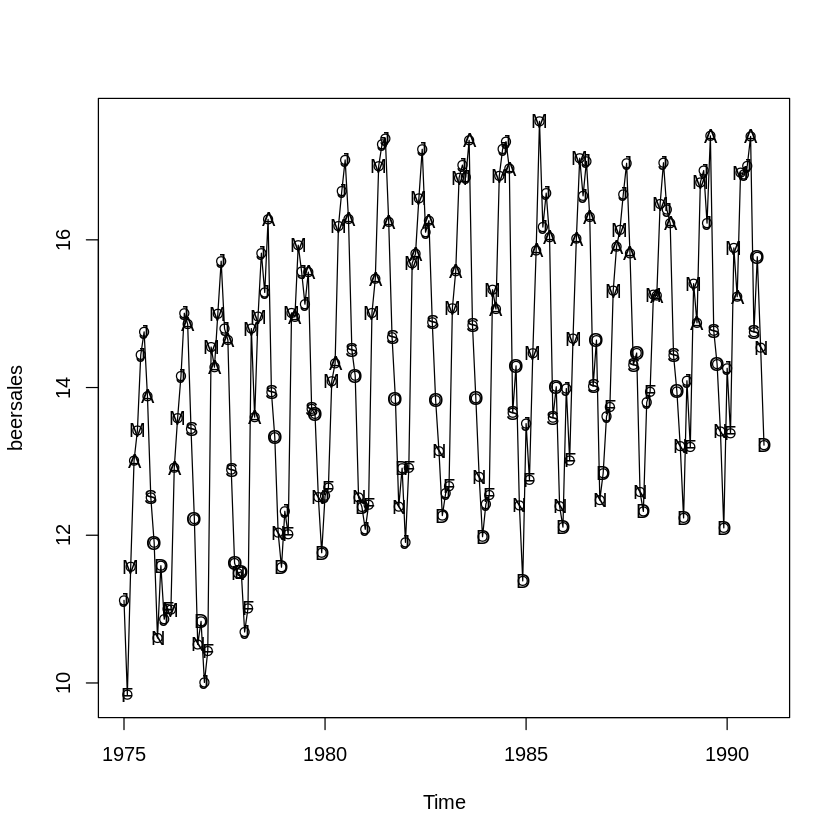

In [3]:
plot(beersales, type='o')
points(y = beersales, x= time(beersales), pch = as.vector(season(beersales))) 

### Beer sales are clearly more during summer than fall & winter.

## (c)

In [4]:
beer_fit1 <- lm(beersales ~ season(beersales))
(summary(beer_fit1))


Call:
lm(formula = beersales ~ season(beersales))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4772  0.1759  0.7312  2.1023 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                12.48568    0.26392  47.309  < 2e-16 ***
season(beersales)February  -0.14259    0.37324  -0.382 0.702879    
season(beersales)March      2.08219    0.37324   5.579 8.77e-08 ***
season(beersales)April      2.39760    0.37324   6.424 1.15e-09 ***
season(beersales)May        3.59896    0.37324   9.643  < 2e-16 ***
season(beersales)June       3.84976    0.37324  10.314  < 2e-16 ***
season(beersales)July       3.76866    0.37324  10.097  < 2e-16 ***
season(beersales)August     3.60877    0.37324   9.669  < 2e-16 ***
season(beersales)September  1.57282    0.37324   4.214 3.96e-05 ***
season(beersales)October    1.25444    0.37324   3.361 0.000948 ***
season(beersales)November  -0.04797    0.37324  -0.129 0.897881    
season(beersales)Decembe

### All comparisons are made against january. The model is statistically significant. Most of the factors are significant (mostly the winter months as expected).

## (d)

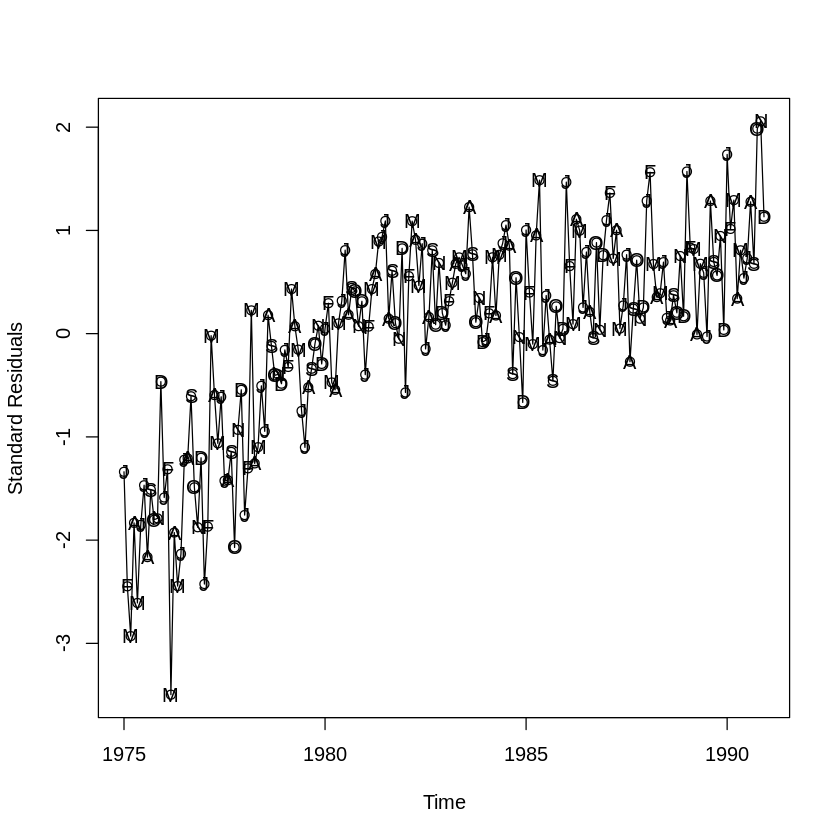

In [5]:
plot(y=rstandard(beer_fit1), x=as.vector(time(beersales)), type = 'o',ylab='Standard Residuals',xlab='Time')
points(y = rstandard(beer_fit1), x= as.vector(time(beersales)), pch = as.vector(season(beersales)))

### The residuals are large (i.e. the model is not a good fit)
### The model is not able to capture the long term trends

## (e)

In [6]:
beer_fit2 <- lm(beersales ~ season(beersales) + time(beersales) +
                  I(time(beersales) ^ 2))
(summary(beer_fit2))


Call:
lm(formula = beersales ~ season(beersales) + time(beersales) + 
    I(time(beersales)^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03203 -0.43118  0.04977  0.34509  1.57572 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -7.150e+04  8.791e+03  -8.133 6.93e-14 ***
season(beersales)February  -1.579e-01  2.090e-01  -0.755  0.45099    
season(beersales)March      2.052e+00  2.090e-01   9.818  < 2e-16 ***
season(beersales)April      2.353e+00  2.090e-01  11.256  < 2e-16 ***
season(beersales)May        3.539e+00  2.090e-01  16.934  < 2e-16 ***
season(beersales)June       3.776e+00  2.090e-01  18.065  < 2e-16 ***
season(beersales)July       3.681e+00  2.090e-01  17.608  < 2e-16 ***
season(beersales)August     3.507e+00  2.091e-01  16.776  < 2e-16 ***
season(beersales)September  1.458e+00  2.091e-01   6.972 5.89e-11 ***
season(beersales)October    1.126e+00  2.091e-01   5.385 2.27e-07 ***
season(beersal

### This model fits the data better, explaining 0.91 of the variance.

## (f)

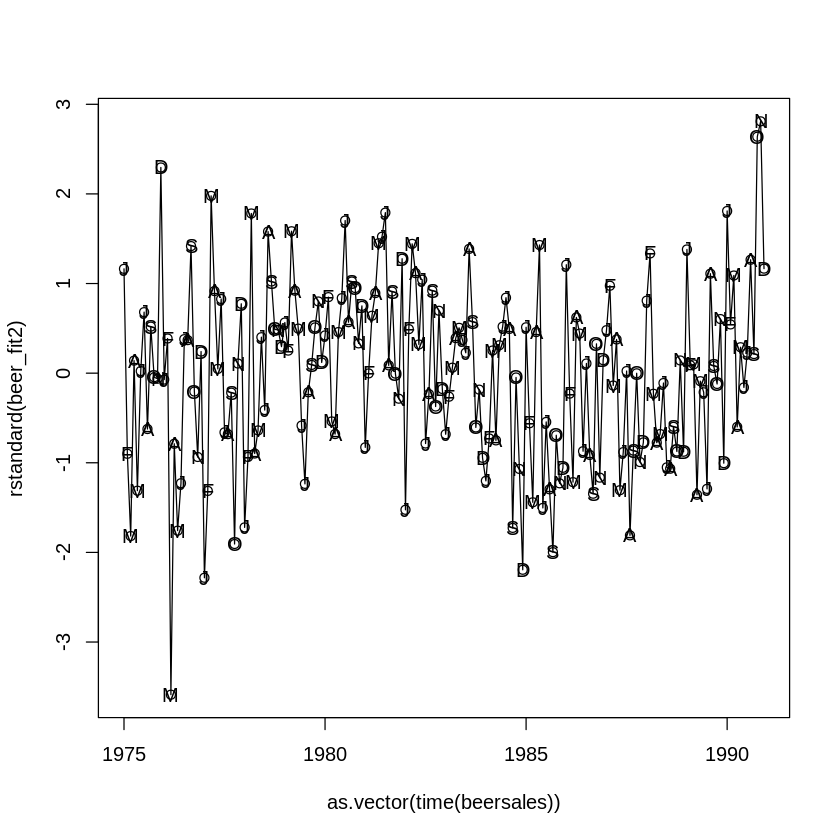

In [7]:
plot(y=rstandard(beer_fit2), x= as.vector(time(beersales)), type='o')
points(y = rstandard(beer_fit2), x= as.vector(time(beersales)), pch = as.vector(season(beersales)))

### We’re able to model the long term trend but still not able to predict many of the values

# Question 2

## (a)

In [8]:
beer_quad_seasonal <- lm(beersales ~ time(beersales) + I(time(beersales)^2) +
                           season(beersales))
beer_resid <- rstudent(beer_quad_seasonal)

## (b)

In [9]:
runs(beer_resid)

$pvalue
[1] 0.0127

$observed.runs
[1] 79

$expected.runs
[1] 96.625

$n1
[1] 90

$n2
[1] 102

$k
[1] 0

### It is significant (0.0127)

## (c)

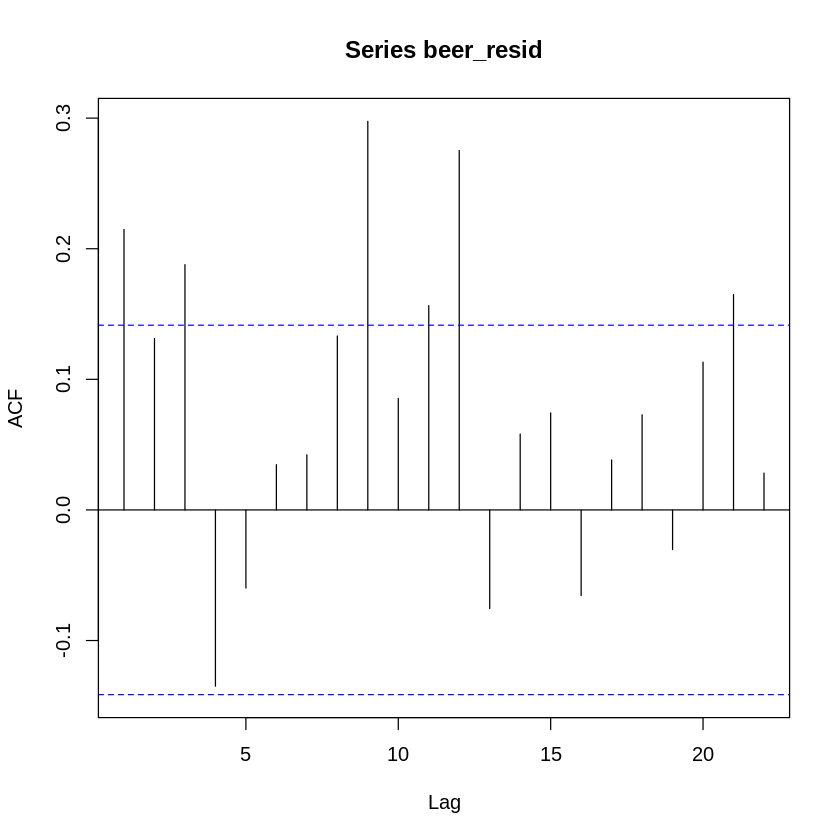

In [10]:
acf(beer_resid)

### For several of the lags, correlations are significant, which leads us to question independence.

## (d)

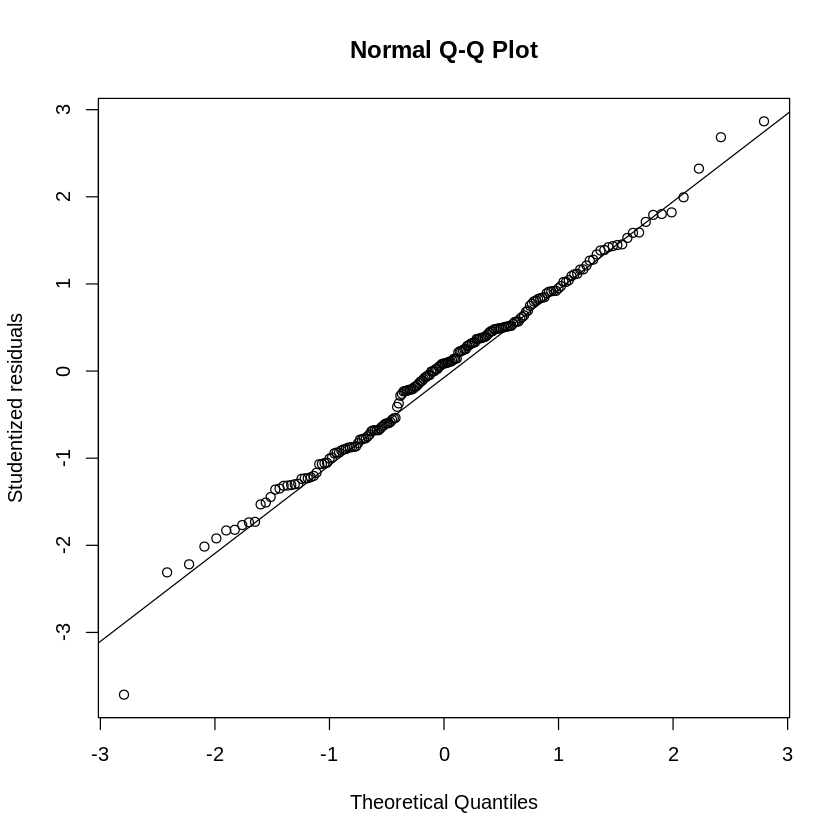

In [11]:
qqnorm(beer_resid,ylab="Studentized residuals")
qqline(beer_resid)

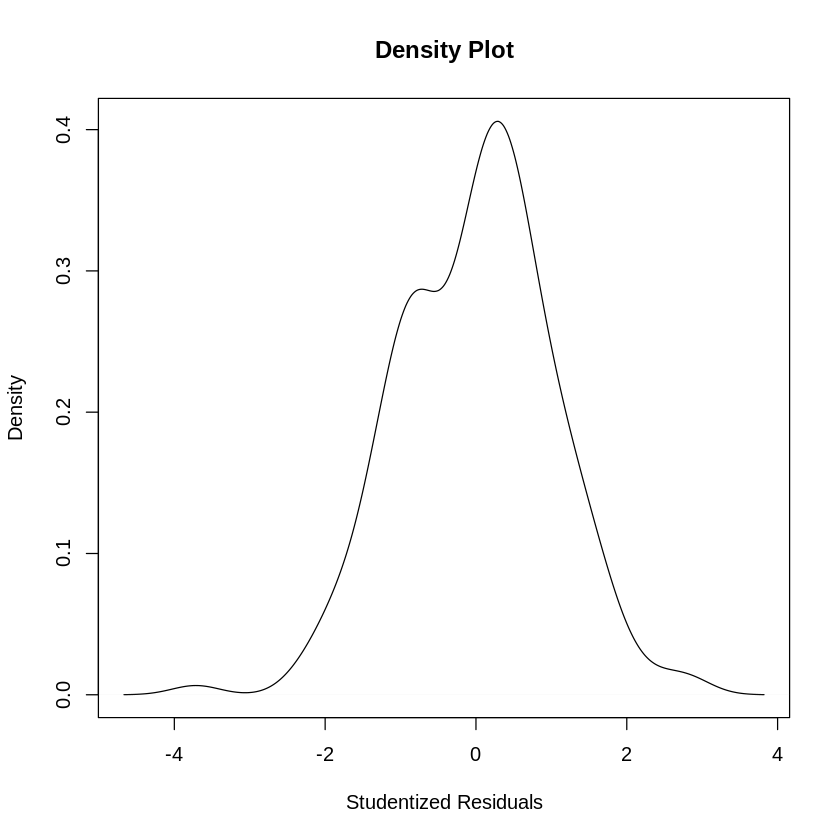

In [12]:
plot(density(beer_resid),xlab='Studentized Residuals',main='Density Plot')

# Question 3

[1] 0.5
[1] -0.5


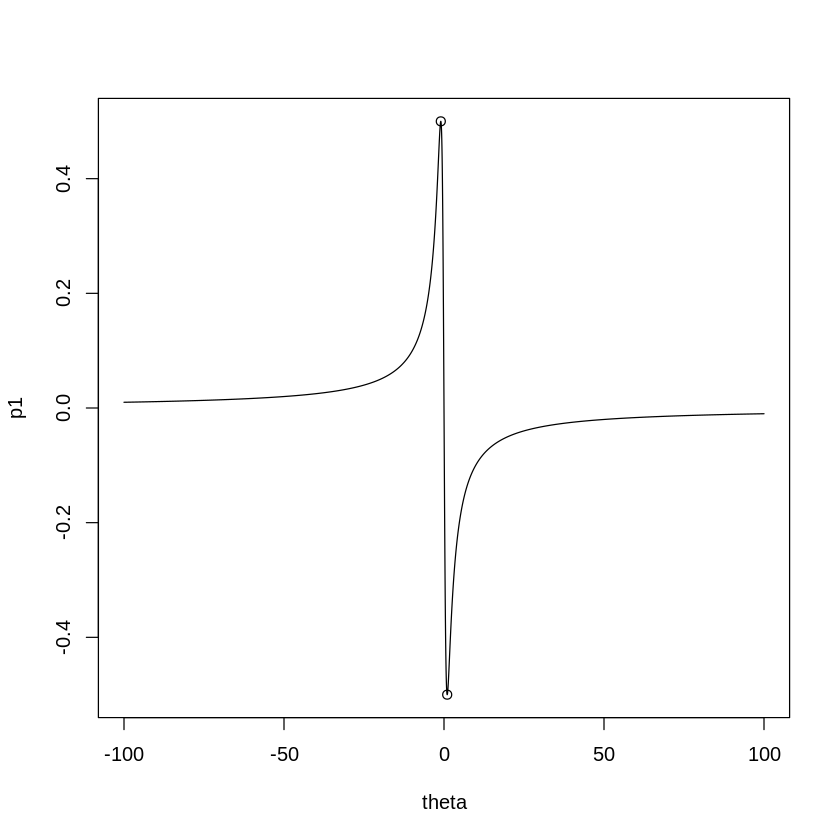

In [13]:
theta <- seq(-100, 100, by = 0.01)
p1 <- (-theta) / (1 + theta^2)
plot(theta, p1, type = "l",ylim=c(-0.5,0.5))
points(theta[which.max(p1)], max(p1))
points(theta[which.min(p1)], min(p1))
print(max(p1))
print(min(p1))

### The max and min values are 0.5 and -0.5 respectively.

# Question 5

### It's similar to AR(1) having $\rho_k=-(-0.5)^k$ 

In [14]:
ARMAacf(ar = -0.5, lag.max = 7)

0          1          2          3          4          5          6 
 1.0000000 -0.5000000  0.2500000 -0.1250000  0.0625000 -0.0312500  0.0156250 
         7 
-0.0078125

In [15]:
ARMAacf(ma = -c(0.5, -0.25, 0.125, -0.0625, 0.03125, -0.0015625))

0            1            2            3            4            5 
 1.000000000 -0.499669415  0.249157053 -0.123223218  0.058900991 -0.024029260 
           6            7 
 0.001172159  0.000000000